<a href="https://colab.research.google.com/github/svmiko/nus-sds-datathon-2024/blob/main/NUS_DATATHON_SINGLIFE_csjws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
#%pip install pandas
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME
%pip install skimpy
%pip install numpy
%pip install matplotlib
%pip install kmodes
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.1/866.1 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalli

In [2]:
import matplotlib.pyplot as plt

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [ ]:
## note: comment out to test on local
#from google.colab import drive
#drive.mount('/content/drive')

#!mkdir -p ./data
#!ln -sfn "/content/drive/My Drive/NUS Datathon 2024/data/catB_train.parquet" "./data/catB_train.parquet"


Mounted at /content/drive


In [4]:
## note: comment out to test on local
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ./data
!ln -sfn "/content/drive/My Drive/NUS Datathon 2024/data/catB_train.parquet" "./data/catB_train.parquet"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file


### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [6]:
###...code...###
da = pd.read_parquet(filepath)

In [7]:
da.shape

(17992, 304)

In [8]:
pd.set_option('display.max_columns', None)
da.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_

# Cleaning steps


The following functions help with printing checks for the data



In [9]:
def get_missing_data(all_data):
  na_counts = all_data.isna().sum()
  cols_missing_data = na_counts[na_counts > 0].index.tolist()
  da_missing_data = all_data[cols_missing_data]
  return da_missing_data

def get_no_missing_data(all_data):
  na_counts = all_data.isna().sum()
  cols_no_missing_data = na_counts[na_counts == 0].index.tolist()
  da_no_missing_data = all_data[cols_no_missing_data]
  return da_no_missing_data

def get_data_information(data):
  da_missing_data = get_missing_data(data)
  da_no_missing_data = get_no_missing_data(data)

  print(f'Data Shape: {data.shape}')
  print(f'Total columns kept: {data.shape[1]}')
  print(f'-- with missing data: {da_missing_data.shape[1]}')
  print(f'-- without missing data: {da_no_missing_data.shape[1]}')

In [10]:
da_f_purchase = da["f_purchase_lh"]
da_all = da.copy()
da = da.drop("f_purchase_lh",axis=1)

### Cleaning 1

`clean1`:
1. Changes the format of missing data so that NaN is used consistently
2. Deletes columns with only NA values

In [11]:
def clean1(da):
  # Change the format of missing data so that NaN is used consistently for missing data
  import numpy as np
  da=da.drop('clntnum',axis=1) # drop id column
  da.replace([9999,'9999','null', 'None', 'NaN', None], np.nan, inplace=True)

  na_counts = da.isna().sum()
  # Delete columns that only have NA values
  cols_deleted1 = na_counts[na_counts == 17992].index.tolist()
  cols_cleaning1 = na_counts[na_counts < 17992].index.tolist()
  da_cleaning1 = da[cols_cleaning1]
  print(f'{len(cols_deleted1)} columns with missing data deleted. Columns: {cols_deleted1}')

  return da_cleaning1

da_cleaning1=clean1(da)
get_data_information(da_cleaning1)

<ipython-input-11-5dc086c1f681>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da.replace([9999,'9999','null', 'None', 'NaN', None], np.nan, inplace=True)


16 columns with missing data deleted. Columns: ['n_months_since_lapse_ltc_1280bf', 'n_months_since_lapse_inv_dcd836', 'n_months_since_lapse_lh_d0adeb', 'n_months_since_lapse_32c74c', 'n_months_last_bought_d0adeb', 'n_months_last_bought_ltc_1280bf', 'n_months_last_bought_inv_dcd836', 'n_months_last_bought_lh_d0adeb', 'giclaim_cnt_success', 'recency_giclaim_success', 'giclaim_cnt_unsuccess', 'recency_giclaim_unsuccess', 'flg_gi_claim_29d435_ever', 'flg_gi_claim_058815_ever', 'flg_gi_claim_42e115_ever', 'flg_gi_claim_856320_ever']
Data Shape: (17992, 286)
Total columns kept: 286
-- with missing data: 128
-- without missing data: 158


`remove_col_one_unique_val`:
1. Remove columns with only one unique value for all rows

In [12]:
def remove_col_one_unique_val(data):

  # Remove columns with only one unique value for all rows
  da_no_missing_data = get_no_missing_data(data)
  unique_columns = da_no_missing_data.nunique()
  drop_columns = da_no_missing_data[unique_columns[unique_columns==1].index].columns.tolist()
  return data.drop(columns = drop_columns, index=1)

da_cleaning1 = remove_col_one_unique_val(da_cleaning1)
get_data_information(da_cleaning1)

Data Shape: (17991, 241)
Total columns kept: 241
-- with missing data: 128
-- without missing data: 113


In [13]:
get_no_missing_data(da_cleaning1).head()

,clttype,stat_flag,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,tot_inforce_pols,ape_grp_6fc3e6,ape_grp_de05ae,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_grp_94baec,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_grp_1581d7,sumins_lh_507c37,sumins_inv_e9f316,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_grp_70e1dd,sumins_grp_fe5fb8,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_grp_94baec,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,ape_839f8a,ape_e22a6a,ape_c4bda5,ape_ltc,ape_507c37,f_hold_839f8a,f_hold_e22a6a,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,sumins_839f8a,sumins_c4bda5,sumins_ltc,sumins_507c37,prempaid_839f8a,prempaid_e22a6a,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_gi,f_ever_bought_grp_6fc3e6,f_ever_bought_grp_de05ae,f_ever_bought_grp_945b5a,f_ever_bought_grp_6a5788,f_ever_bought_ltc_43b9d5,f_ever_bought_grp_9cdedf,f_ever_bought_grp_1581d7,f_ever_bought_grp_22decf,f_ever_bought_lh_507c37,f_ever_bought_lh_839f8a,f_ever_bought_inv_e9f316,f_ever_bought_grp_caa6ff,f_ever_bought_grp_fd3bfb,f_ever_bought_lh_e22a6a,f_ever_bought_grp_70e1dd,f_ever_bought_grp_e04c3a,f_ever_bought_grp_fe5fb8,f_ever_bought_grp_94baec,f_ever_bought_grp_e91421,f_ever_bought_lh_f852af,f_ever_bought_lh_947b15,f_elx,f_mindef_mha,f_retail
19550,P,ACTIVE,1,0,0,3,0.00,0.00,0.00,0.00,551.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,700.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29203.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16854.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,318.00,0.00,551.00,0.00,0,1,0,1,0,0.00,0.00,700.00,0.00,0.00,16854.00,0.00,29203.00,0.00,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4600,P,ACTIVE,45,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13337,P,ACTIVE,47,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15074,P,ACTIVE,22,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19724,P,ACTIVE,62,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,348.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

## Cleaning 2

**Data checks**

The following codes are used to check for the characteristics of columns with missing data

In [14]:
## Notice that for items with only one other value and NaN, the NaN may represent a different value
## Additionally, these columns if imputed, will not contain useful information
## Since all imputations will be done to 0.

da_missing_data = get_missing_data(da_cleaning1)
cols_missing_data = list(da_missing_data.columns)

for col in cols_missing_data:
  unique_vals = da_missing_data[col].unique()
  if len(unique_vals) == 2:
    print(f'{col} : {unique_vals}')

is_dependent_in_at_least_1_policy : [ 0. nan]
f_ever_declined_la : [nan  1.]
lapse_ape_ltc_1280bf : [Decimal('0.00') nan]
lapse_ape_inv_dcd836 : [Decimal('0.00') nan]
lapse_ape_lh_d0adeb : [Decimal('0.00') nan]
lapse_ape_32c74c : [Decimal('0.00') nan]
flg_affconnect_show_interest_ever : [nan  1.]
flg_affconnect_ready_to_buy_ever : [nan  1.]
flg_hlthclaim_839f8a_ever : [nan  1.]
flg_hlthclaim_14cb37_ever : [nan  1.]


`clean2`:
1. Inpute NaN with 0s for columns with unique values NaN and 1 only
2. Remove columns with unique values 0 and NaN only

In [15]:
def clean2(da_cleaning1):
  ## If the only unique values are NaN and 1, NaN represents 0
  ## See the case of our target variable f_purchase_lh
  cols_inpute_with_zeros = []
  cols_to_remove = []
  for col in cols_missing_data:
    unique_vals = da_missing_data[col].unique()
    if len(unique_vals) == 2:
      if 1 in unique_vals: # if 1 and NaN are in list
        if col in da_cleaning1.columns:
          cols_inpute_with_zeros.append(col)
      else:
        cols_to_remove.append(col)

  # Inpute with 0
  for col in cols_inpute_with_zeros:
      da_cleaning1[col] = da_cleaning1[col].fillna(0)

  da_cleaning2 = da_cleaning1

  ## For the columns with 0 and NaN only, remove those columns
  # as the variables are ambiguous and will offer no further information (due to lack of variance)
  da_cleaning2.drop(cols_to_remove,axis=1,inplace=True)

  return da_cleaning2

da_cleaning2 = clean2(da_cleaning1)
get_data_information(da_cleaning2)


Data Shape: (17991, 236)
Total columns kept: 236
-- with missing data: 118
-- without missing data: 118


# Data Imputation
Replacing null values with 0
<br/>
Creating indicator columns that may be useful for analysis

For columns with more than 10000 rows of missing values:
<br/>
recency_lapse: NaN refers to people who has managed to make their required payments to avoid lapse of insurance - replace with 0
<br/>
recency_cancel: NaN refers to people who has NOT cancelled any insurance - replace with 0
<br/>
tot_cancel_pols: NaN refers to 0 cancelled policies
<br/>
lapse_ape_grp_: NaN for no apparent reason, both 0 and NaN were used for cases where customers have not bought the policy. I would suggest to not use these columns.
<br/>
n_months_since_lapse_grp_: NaN refers to those whose policy did not lapse or did not even have the policy in the first place. replace with 0.
<br/>
flg_affconnect_lapse_ever: not sure why this has NaN values, suggest to not use this column.
<br/>
affcon_visit_days: suggest to not use this column
<br/>
clmcon_visit_days: suggest to not use
<br/>
recency_clmcon: suggest to not use
<br/>
recency_clmcon_regis: NaN probably refers to people not registered with claim connect so might not make sense to replace with 0 as it makes it seem as though they have just registered today
<br/>
hlthclaim_amt: NaN when the customer has not attempted to claim before
<br/> for all the claims column, the NaN is just for customers who have no attempted any claims before.


## Categorical

In [16]:
def clean_categorical(da_cleaning2):

  ## Add indicator vars

  # New indicator variable which denote whether the user has any insurance lapse.
  da_cleaning3= da_cleaning2.copy()
  da_cleaning3['lapse_ind'] = (da_cleaning3['recency_lapse'] != 0).astype(int)

  # Taking people who have not attempted policy cancellation as 0 instead of NaN.
  # New indicator variable to denote whether the user has any policy cancellation
  da_cleaning3['recency_cancel'] = da_cleaning3['recency_cancel'].fillna(0)
  da_cleaning3['cancel_ind'] = (da_cleaning3['recency_cancel'] != 0).astype(int)

  # Replacing NaN with 0 as it refers to people who have not cancelled any policies
  da_cleaning3['tot_cancel_pols'] = da_cleaning3['tot_cancel_pols'].fillna(0)

  # New indicator to denote whether customer has registered with claim connect
  da_cleaning3['clmcon_ind'] = da_cleaning3['recency_clmcon_regis'].notna().astype(int)

  # New indicator to denote whether customer has attempted a health claim (regardless of success)
  da_cleaning3['hlthclaim_ind'] = da_cleaning3['hlthclaim_amt'].notna().astype(int)

  # New indicator to denote whether customer has attempted a general insurance claim (regardless of success)
  da_cleaning3['giclaim_ind'] = da_cleaning3['giclaim_amt'].notna().astype(int)

  ## Change the following categorical data to more meaningful data for analysis

  # One hot encode 'race_desc', 'clttype' and 'stat_flag'
  def one_hot_encode(data, category):
    dummies = pd.get_dummies(data[category], prefix=f'{category}', dummy_na=True)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(category, axis=1)

    nan_column = f'{category}_nan'
    if nan_column in data.columns:
        data = data.drop(nan_column, axis=1)

    return data

  da_cleaning3 = one_hot_encode(da_cleaning3,'race_desc')
  da_cleaning3 = one_hot_encode(da_cleaning3,'clttype')
  da_cleaning3 = one_hot_encode(da_cleaning3,'stat_flag')

  # ctrycode_desc
  import numpy as np
  da_cleaning3['ctry_Singapore'] = np.where(da_cleaning3['ctrycode_desc'] == 'Singapore', 1, 0)
  da_cleaning3.drop('ctrycode_desc',axis=1,inplace=True)

  # cltsex_fix
  import numpy as np
  da_cleaning3['cltsex_female'] = np.where(da_cleaning3['cltsex_fix'] == 'Female', 1, 0)
  da_cleaning3.drop('cltsex_fix',axis=1,inplace=True)

  # annual_income_est, use it as ordinal data
  da_cleaning3['annual_income_est'] = da_cleaning3['annual_income_est'].replace(
      {'A.ABOVE200K': 5, 'B.100K-200K': 4,
       'C.60K-100K': 3, 'D.30K-60K': 2,
       'E.BELOW30K': 1
       })

  return da_cleaning3

In [17]:
da_imputation1 = clean_categorical(da_cleaning2)
get_data_information(da_imputation1)

<ipython-input-16-e27ebdedd004>:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da_cleaning3['annual_income_est'] = da_cleaning3['annual_income_est'].replace(


Data Shape: (17991, 248)
Total columns kept: 248
-- with missing data: 113
-- without missing data: 135


`impute_data_categorical`:
1. Imputes data for categorical columns with less than 10000 missing rows

In [18]:
def impute_categorical(da_cleaning3):
  # data imputation for categorical columns with less than 10000 missing row
  threshold = 10000
  da_imputation = da_cleaning3
  da_missing_data = get_missing_data(da_imputation)
  nan_counts = da_missing_data.isna().sum()
  nan_columns_below_threshold = da_missing_data[nan_counts[nan_counts <= threshold].index]
  nan_columns_below_threshold = nan_columns_below_threshold.drop(columns='hh_size_est')
  selected_columns = nan_columns_below_threshold.filter(regex='^(flg_|f_|is_|race_|ctrycode_|cltsex_|annual_)').columns.tolist()
  def fill_na_categorical(data, selected_columns):
    for col in selected_columns:
      majority_class = data[col].mode()[0]
      data[col].fillna(majority_class, inplace=True)
    return data

  da_imputation = fill_na_categorical(da_imputation,selected_columns)


  return da_imputation

da_imputation2 = impute_categorical(da_imputation1)
get_data_information(da_imputation2)

<ipython-input-18-7d27a28ad792>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(majority_class, inplace=True)


Data Shape: (17991, 248)
Total columns kept: 248
-- with missing data: 93
-- without missing data: 155


## Continuous
The following chunk cleans and analyses continuous columns with missing data. Finally, data inputation is done for continuous columns with less than 10000 missing rows.

In [19]:
def clean_continuous(da_imputation):
  from datetime import datetime
  import pandas as pd

  # Replace cltdob_fix with age
  da_imputation['cltdob_fix'] = pd.to_datetime(da_imputation['cltdob_fix'])
  current_date = datetime.now()
  da_imputation['age'] = (current_date - da_imputation['cltdob_fix']).dt.days // 365.25  # calculate age in years
  da_imputation = da_imputation.drop(columns=['cltdob_fix'])

  # Replace min_occ_date with occ_year
  da_imputation['min_occ_date'] = pd.to_datetime(da_imputation['min_occ_date'])
  current_date = datetime.now()
  da_imputation['occ_year'] = (current_date - da_imputation['min_occ_date']).dt.days // 365.25  # calculate occ_year in years
  da_imputation = da_imputation.drop(columns=['min_occ_date'])

  return da_imputation

da_imputation3 = clean_continuous(da_imputation2)
get_data_information(da_imputation3)

Data Shape: (17991, 248)
Total columns kept: 248
-- with missing data: 93
-- without missing data: 155


In [20]:
def get_missing_continuous_data_info(da_imputation):
  # percentage of continuous data missing
  continuous_column_missing = ['hh_20', 'pop_20', 'hh_size', 'age', 'occ_year']
  missing_percentage = da_imputation[continuous_column_missing].isna().mean() * 100

  missing_data_info = pd.DataFrame({
      'Column': missing_percentage.index,
      'Missing Percentage': missing_percentage.values
  })

  print(missing_data_info)

get_missing_continuous_data_info(da_imputation3)

#      Column  Missing Percentage
# 0     hh_20           15.613362
# 1    pop_20           15.613362
# 2   hh_size           15.613362
# 3       age            0.122283
# 4  occ_year            0.055583

     Column  Missing Percentage
0     hh_20           15.613362
1    pop_20           15.613362
2   hh_size           15.613362
3       age            0.122283
4  occ_year            0.055583


In [21]:
def impute_continuous(da_imputation):
# data imputation for continuous columns
  continuous_column_missing = ['hh_20', 'pop_20', 'hh_size', 'age', 'occ_year']
  da_imputation[continuous_column_missing]=da_imputation[continuous_column_missing].astype(float)
  def fill_na_continuous(data, columns):
    for col in columns:
      mean_value = data[col].mean()
      data.fillna({col:mean_value},inplace=True)
    return data

  da_imputation = fill_na_continuous(da_imputation, continuous_column_missing)
  return da_imputation

da_imputation4 = impute_continuous(da_imputation3)
get_data_information(da_imputation4)


Data Shape: (17991, 248)
Total columns kept: 248
-- with missing data: 88
-- without missing data: 160


In [22]:
# EDA function on columns without missing data

from skimpy import skim
skim(get_no_missing_data(da_imputation4))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17991  │ │ float64     │ 95    │                                                          │
│ │ Number of columns │ 160    │ │ int64       │ 55    │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 10    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0  ┃ p25  ┃ p50 ┃ p75    ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ flg_substandard         │   0 │     0 │    0.038 │    0.19 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_is_borderline_stand │   0 │     0 │    0.031 │    0.17 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ ard                     │     │       │          │         │     │      │     │        │          │        │  │
│ │ flg_is_revised_term     │   0 │     0 │  0.00067 │   0.026 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_is_rental_flat      │   0 │     0 │    0.012 │    0.11 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_has_health_claim    │   0 │     0 │    0.046 │    0.21 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_has_life_claim      │   0 │     0 │   0.0034 │   0.058 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_gi_claim            │   0 │     0 │    0.031 │    0.17 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_is_proposal         │   0 │     0 │   0.0027 │   0.052 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ flg_with_preauthorisati │   0 │     0 │   0.0078 │   0.088 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ on                      │     │       │          │         │     │      │     │        │          │        │  │
│ │ flg_is_returned_mail    │   0 │     0 │    0.018 │    0.13 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ is_consent_to_mail      │   0 │     0 │      0.3 │    0.46 │   0 │    0 │   0 │      1 │        1 │ ▇    ▃ │  │
│ │ is_consent_to_email     │   0 │     0 │     0.36 │    0.48 │   0 │    0 │   0 │      1 │        1 │ ▇    ▅ │  │
│ │ is_consent_to_call      │   0 │     0 │     0.11 │    0.32 │   0 │    0 │   0 │      0 │        1 │ ▇    ▁ │  │
│ │ is_consent_to_sms       │   0 │     0 │     0.24 │    0.43 │   0 │    0 │   0 │      0 │        1 │ ▇    ▃ │  │
│ │ is_valid_dm             │   0 │     0 │     0.73 │    0.44 │   0 │    0 │   1 │      1 │        1 │ ▃    ▇ │  │
│ │ is_valid_email          │   0 │     0 │     0.76 │    0.43 │   0 │    1 │   1 │      1 │        1 │ ▃    ▇ │  │
│ │ is_housewife_retiree    │   0 │     0 │    0.003 │   0.055 │   0 │    0 │   0 │      0 │        1 │   ▇    │  │
│ │ is_sg_pr                │   0 │     0 │     0.92 │    0.27 │   0 │    1 │   1 │      1 │        1 │ ▁    ▇ │  │
│ │ is_class_1_2            │   0 │     0 │     0.56 │     0.5 │   0 │    0 │   1 │      1 │        1 │ ▆    ▇ │  │
│ │ f_ever_declined_la      │   0 │     0 │    0.069 │  

In [23]:
skim(get_missing_data(da_imputation4))

# Importantly, all the missing data here have more than 50% missing data
# These information are already contained in other variables or in our indicator variables

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17991  │ │ string      │ 50    │                                                          │
│ │ Number of columns │ 88     │ │ float64     │ 38    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25  ┃ p50  ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ recency_lapse            │  12591 │  69.98 │     77 │     63 │   1 │   32 │   63 │   100 │    490 │  ▇▃▁   │  │
│ │ lapse_ape_grp_6fc3e6     │  12591 │  69.98 │   0.62 │    9.8 │   0 │    0 │    0 │     0 │    290 │   ▇    │  │
│ │ lapse_ape_grp_de05ae     │  12591 │  69.98 │   0.23 │     17 │   0 │    0 │    0 │     0 │   1200 │   ▇    │  │
│ │ lapse_ape_grp_945b5a     │  12591 │  69.98 │     13 │    150 │   0 │    0 │    0 │     0 │   4200 │   ▇    │  │
│ │ lapse_ape_grp_6a5788     │  12591 │  69.98 │    1.5 │     28 │   0 │    0 │    0 │     0 │   1100 │   ▇    │  │
│ │ lapse_ape_ltc_43b9d5     │  12591 │  69.98 │      9 │     79 │   0 │    0 │    0 │     0 │   2100 │   ▇    │  │
│ │ lapse_ape_grp_9cdedf     │  12591 │  69.98 │    3.6 │     69 │   0 │    0 │    0 │     0 │   3500 │   ▇    │  │
│ │ lapse_ape_grp_1581d7     │  12591 │  69.98 │      3 │     20 │   0 │    0 │    0 │     0 │    710 │   ▇    │  │
│ │ lapse_ape_grp_22decf     │  12591 │  69.98 │    7.4 │    130 │   0 │    0 │    0 │     0 │   5000 │   ▇    │  │
│ │ lapse_ape_lh_507c37      │  12591 │  69.98 │    130 │    640 │   0 │    0 │    0 │     0 │  16000 │   ▇    │  │
│ │ lapse_ape_lh_839f8a      │  12591 │  69.98 │     32 │    360 │   0 │    0 │    0 │     0 │  15000 │   ▇    │  │
│ │ lapse_ape_inv_e9f316     │  12591 │  69.98 │    9.9 │    450 │   0 │    0 │    0 │     0 │  30000 │   ▇    │  │
│ │ lapse_ape_grp_caa6ff     │  12591 │  69.98 │    4.1 │     55 │   0 │    0 │    0 │     0 │   1800 │   ▇    │  │
│ │ lapse_ape_grp_fd3bfb     │  12591 │  69.98 │    1.5 │     32 │   0 │    0 │    0 │     0 │   1500 │   ▇    │  │
│ │ lapse_ape_lh_e22a6a      │  12591 │  69.98 │    240 │    650 │   0 │    0 │    0 │     0 │   8200 │   ▇    │  │
│ │ lapse_ape_grp_70e1dd     │  12591 │  69.98 │     27 │    150 │   0 │    0 │    0 │     0 │   3200 │   ▇    │  │
│ │ lapse_ape_grp_e04c3a     │  12591 │  69.98 │     16 │    280 │   0 │    0 │    0 │     0 │   9700 │   ▇    │  │
│ │ lapse_ape_grp_fe5fb8     │  12591 │  69.98 │     46 │    270 │   0 │    0 │    0 │     0 │   5600 │   ▇    │  │
│ │ lapse_ape_grp_94baec     │  12591 │  69.98 │     34 │    260 │   0 │    0 │    0 │     0 │   7800 │   ▇    │  │
│ │ lapse_ape_grp_e91421     │  12591 │  69.98 │      3 │     72 │   0 │    0 │    0 │     0 │   3500 │   ▇    │  │
│ │ lapse_ape_lh_f852af      │  12591 │  69.98 │    130 │    940 │   0 │    0 │    0 │     0 │  45000 │   ▇    │  │
│ │ lapse_ape_lh_947b15      │  12591 │  69.98 │     66 │    820 │   0 │    0 │    0 │     0 │  39000 │   ▇    │  │
│ │ flg_affconnect_lapse_eve │  17177 │  95.48 │  0.011 

# Choosing features

### Removing correlated features


# Customer segmentation
Here we segment the customer base into different clusters using clustering as it is going to be valuable in trying to achieve the aim of increasing sales.

By customer segmentation:
- Understanding unique customer needs and preferences through segmentation.
- Tailoring products and marketing messages to specific customer segments.
- Implementing targeted marketing strategies to reach potential buyers more effectively.
- Improve our model through better feature engineering and selection
- In future, we can also customise our model to fit each group.

We focus only on the variables regarding the client's demographic eg. age, household background.

In [29]:
sig_da = get_no_missing_data(da_imputation4)

In [30]:
sig_da.shape

(17991, 160)

In [31]:
sig_da.head()

,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,hh_20,pop_20,hh_size,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_grp_6fc3e6,ape_grp_de05ae,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_grp_94baec,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_grp_1581d7,sumins_lh_507c37,sumins_inv_e9f316,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_grp_70e1dd,sumins_grp_fe5fb8,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_grp_94baec,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,ape_839f8a,ape_e22a6a,ape_c4bda5,ape_ltc,ape_507c37,f_hold_839f8a,f_hold_e22a6a,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,sumins_839f8a,sumins_c4bda5,sumins_ltc,sumins_507c37,prempaid_839f8a,prempaid_e22a6a,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_gi,f_ever_bought_grp_6fc3e6,f_ever_bought_grp_de05ae,f_ever_bought_grp_945b5a,f_ever_bought_grp_6a5788,f_ever_bought_ltc_43b9d5,f_ever_bought_grp_9cdedf,f_ever_bought_grp_1581d7,f_ever_bought_grp_22decf,f_ever_bought_lh_507c37,f_ever_bought_lh_839f8a,f_ever_bought_inv_e9f316,f_ever_bought_grp_caa6ff,f_ever_bought_grp_fd3bfb,f_ever_bought_lh_e22a6a,f_ever_bought_grp_70e1dd,f_ever_bought_grp_e04c3a,f_ever_bought_grp_fe5fb8,f_ever_bought_grp_94baec,f_ever_bought_grp_e91421,f_ever_bought_lh_f852af,f_ever_bought_lh_947b15,f_elx,f_mindef_mha,f_retail,flg_affconnect_show_interest_ever,flg_affconnect_ready_to_buy_ever,flg_hlthclaim_839f8a_ever,flg_hlthclaim_14cb37_ever,lapse_ind,cancel_ind,clmcon_ind,hlthclaim_ind,giclaim_ind,race_desc_Chinese,race_desc_Indian,race_desc_Malay,race_desc_Others,clttype_C,clttype_G,clttype_P,stat_flag_ACTIVE,stat_flag_LAPSED,stat_flag_MATURED,ctry_Singapore,cltsex_female,age,occ_year
19550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,144.0,202.0,1.402778,3.0,1,0,0,0.0,3,0.0,0.00,0.00,0.00,0.00,551.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,700.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29203.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16854.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,318.00,0.00,551.00,0.00,0,1,0,1,0,0.00,0.00,700.00,0.00,0.00,16854.00,0.00,29203.00,0.00,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1,0,0,0,0,True,False,False,False,False,False,True,True,False,False,1,1,49.0,6.0
4600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,153.0,480.0,3.137255,2.0,45,0,0,0.0,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [ ]:
var_list = sig_da.columns.tolist()

print(var_list)

In [33]:
# keep variables about client's profile
features_for_clustering = ['hh_size', 'annual_income_est', 'f_elx', 'f_mindef_mha', 'f_retail', 'age',
                           'clttype_P', 'stat_flag_ACTIVE', 'stat_flag_LAPSED',
                           'flg_substandard', 'flg_is_borderline_standard',
                           'flg_is_rental_flat', 'flg_has_health_claim', 'flg_gi_claim', 'flg_is_proposal',
                           'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_call', 'is_consent_to_sms',
                           'is_valid_dm', 'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2',
                           'f_ever_declined_la', 'flg_affconnect_show_interest_ever', 'flg_affconnect_ready_to_buy_ever']
cus_seg_da  = sig_da[features_for_clustering]
cus_seg_da.head()

,hh_size,annual_income_est,f_elx,f_mindef_mha,f_retail,age,clttype_P,stat_flag_ACTIVE,stat_flag_LAPSED,flg_substandard,flg_is_borderline_standard,flg_is_rental_flat,flg_has_health_claim,flg_gi_claim,flg_is_proposal,flg_is_returned_mail,is_consent_to_mail,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,flg_affconnect_show_interest_ever,flg_affconnect_ready_to_buy_ever
19550,1.402778,3.0,0,0,1,49.0,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4600,3.137255,2.0,0,0,1,44.0,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13337,2.887097,5.0,0,0,1,48.0,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
15074,4.000000,4.0,0,0,1,47.0,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
19724,4.192982,1.0,0,0,1,28.0,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_encoded = cus_seg_da.copy()
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[0, 18, 35, 50, 65, float('inf')], labels=[1,2,3,4,5])
df_encoded['hh_size_group'] = pd.cut(df_encoded['hh_size'], bins=[-1, 2, 5, 10], labels=[1,2,3])
df_encoded
df_encoded.drop('age', axis=1, inplace=True)
df_encoded.drop('hh_size', axis=1, inplace=True)

In [37]:
df_encoded.head()

,annual_income_est,f_elx,f_mindef_mha,f_retail,clttype_P,stat_flag_ACTIVE,stat_flag_LAPSED,flg_substandard,flg_is_borderline_standard,flg_is_rental_flat,flg_has_health_claim,flg_gi_claim,flg_is_proposal,flg_is_returned_mail,is_consent_to_mail,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,flg_affconnect_show_interest_ever,flg_affconnect_ready_to_buy_ever,age_group,hh_size_group
19550,3.0,0,0,1,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3,1
4600,2.0,0,0,1,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2
13337,5.0,0,0,1,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3,2
15074,4.0,0,0,1,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3,2
19724,1.0,0,0,1,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2,2


In [39]:
from sklearn.cluster import KMeans

X = df_encoded.values

# Choose the number of clusters (k) based on your business requirements
k = 12

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df_encoded['cluster'] = clusters
df_encoded['cluster12']=clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_encoded.select_dtypes(exclude=['float', 'int', 'category']).columns

Index(['clttype_P', 'stat_flag_ACTIVE', 'stat_flag_LAPSED'], dtype='object')

In [42]:
import numpy as np

centroids = kmeans.cluster_centers_

# Feature statistics for each cluster
for i in range(k):
    print(f"Cluster {i} statistics:")
    print(df_encoded[clusters == i].describe())

# Cluster sizes
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))


Cluster 0 statistics:
       annual_income_est        f_elx  f_mindef_mha     f_retail  \
count        1466.000000  1466.000000   1466.000000  1466.000000   
mean            2.602319     0.050477      0.057981     0.963847   
std             0.489586     0.219003      0.233787     0.186734   
min             2.000000     0.000000      0.000000     0.000000   
25%             2.000000     0.000000      0.000000     1.000000   
50%             3.000000     0.000000      0.000000     1.000000   
75%             3.000000     0.000000      0.000000     1.000000   
max             3.000000     1.000000      1.000000     1.000000   

       flg_substandard  flg_is_borderline_standard  flg_is_rental_flat  \
count      1466.000000                 1466.000000         1466.000000   
mean          0.050477                    0.055935            0.028649   
std           0.219003                    0.229874            0.166876   
min           0.000000                    0.000000            0.00000

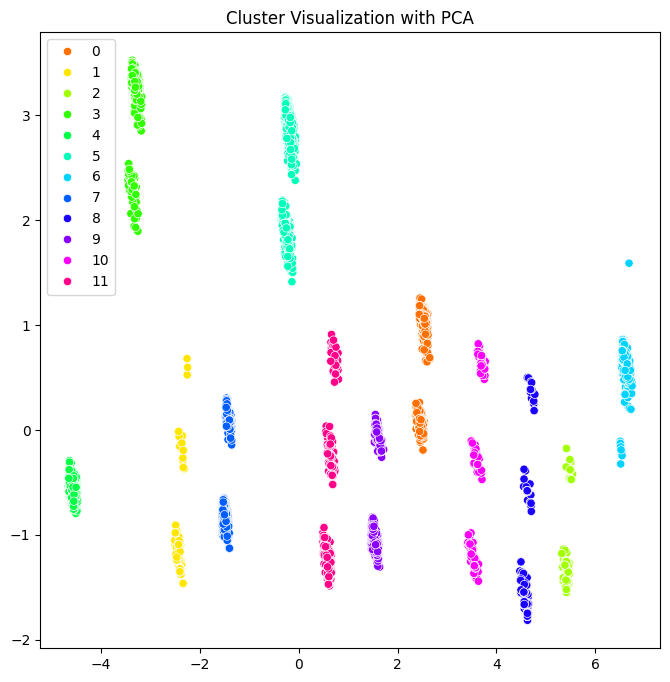

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

plt.figure(figsize=(8,8))
sns.scatterplot(x=principalComponents[:,0], y=principalComponents[:,1], hue=clusters, palette=sns.color_palette("hsv", k))
plt.title('Cluster Visualization with PCA')
plt.show()


Cluster 1:

Higher Income, Moderately Engaged: These individuals have higher income estimates and show moderate engagement across most categories, indicating they may be middle-class consumers with specific interests in health and retail.

Cluster 2:

Low Engagement, Privacy-Conscious: With almost no consent to mail or calls and a low income estimate, this group seems very privacy-conscious and possibly less receptive to direct marketing.

Cluster 3:

Moderate Income, Retail-Focused: This group has a moderate income and a high retail engagement. They might be interested in products that offer good value for money.

Cluster 4:

Affluent, Defense Connected: They have a high income estimate and connections to defense, which suggests they could be targeted with more premium insurance products or services.

Cluster 5:

Defense Focused, Low Income: This cluster is uniquely characterized by defense connections (100% on f_mindef_mha) and lower income, indicating a group possibly composed of lower-ranking military personnel or veterans.

Cluster 6:

Moderate Income, Health and Retail Engaged: A group with moderate income and higher engagement in health and retail, similar to Cluster 3 but with a slightly higher income and a notable consent to communication.

Cluster 7:

Middle-Income, Varied Interests: These individuals have a middle income and show some level of interest across a variety of categories, suggesting a diverse set of needs and interests.

Cluster 8:

Low to Moderate Income, High Consent to SMS: This cluster has a lower income range and a very high consent to SMS, which might suggest they are more reachable through mobile marketing strategies.

Cluster 9:

Very High Engagement, Low Income: This group is highly engaged with nearly universal consent to mail, call, and SMS, despite their low income. They might be very open to communication but require more affordable options.

Cluster 10:

Low to Moderate Income, Selective Engagement: They have a low to moderate income with selective engagement, showing high engagement in certain areas like the electoral process (f_elx) and defense (f_mindef_mha), but low in others.

Cluster 11:

Higher Income, Engaged and Diverse: With the second-highest income estimate and a variety of interests, this cluster may represent a more affluent and diverse consumer base that could be interested in a wide range of products and services.
These interpretations are speculative and based on the mean values provided. For a more accurate analysis, each feature should be looked at in the context of the specific industry and the objectives of the analysis. It's also important to consider other statistical measures and distribution shapes, such as standard deviations and maximum values, which provide a fuller picture of each cluster's characteristics.

In [44]:
#Silhoutte Scores

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15]
silhouette_avg_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# The optimal number of clusters is the one with the highest average silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [45]:
silhouette_avg_scores

[0.4232326000655255,
 0.3423483659232419,
 0.37604927663851784,
 0.38069500874630696,
 0.3861505842563071,
 0.40629138195653147,
 0.40865635910087433,
 0.4077093429863482,
 0.4216438895689034,
 0.43239642233997144,
 0.3834906805413253,
 0.38920886435421137,
 0.3725416425730615,
 0.3922024096980785]

From the silhoutte scores, we can see that 7 and 9 clusters might be a better fit than 12 clusters.

In [49]:
# Perform clustering with 7 clusters
kmeans_7 = KMeans(n_clusters=7, random_state=42)
clusters_7 = kmeans_7.fit_predict(df_encoded)
df_encoded['cluster_7'] = clusters_7  # Add cluster labels to the DataFrame

# Perform clustering with 9 clusters
kmeans_9 = KMeans(n_clusters=9, random_state=42)
clusters_9 = kmeans_9.fit_predict(df_encoded)
df_encoded['cluster_9'] = clusters_9  # Add cluster labels to the DataFrame


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
def cluster(data):
  kmeans_9 = KMeans(n_clusters=9, random_state=42)
  clusters_9 = kmeans_9.fit_predict(data.values)
  data['cluster_9'] = clusters_9
  return data

In [51]:
# Function to interpret clusters
def interpret_clusters(kmeans_model, df, cluster_label):
    # Get cluster centers
    cluster_centers = kmeans_model.cluster_centers_

    # Count the points in each cluster
    cluster_sizes = df[cluster_label].value_counts().sort_index()

    # Interpretation: for each cluster, show the center values and the size
    for i in range(kmeans_model.n_clusters):
        print(f"Cluster {i} center: {cluster_centers[i]}")
        print(f"Cluster {i} size: {cluster_sizes[i]}")
        print()

# Interpret clusters for 7-cluster model
print("7-cluster model interpretation:")
interpret_clusters(kmeans_7, df_encoded, 'cluster_7')

# Interpret clusters for 9-cluster model
print("9-cluster model interpretation:")
interpret_clusters(kmeans_9, df_encoded, 'cluster_9')

7-cluster model interpretation:
Cluster 0 center: [ 1.50061881e+00  3.46534653e-02  6.23762376e-01  4.33787129e-01
  6.11386139e-01  6.22524752e-01  3.76237624e-01  3.09405941e-03
  4.95049505e-03  6.18811881e-03  3.71287129e-03  2.66089109e-02
  6.18811881e-04  4.33168317e-03  3.47153465e-01  1.01485149e-01
  2.68564356e-01  3.27970297e-02  8.47772277e-01 -8.23993651e-18
  9.68440594e-01  1.42326733e-02  2.53712871e-02  9.77722772e-02
  1.55321782e-01  2.31621287e+00  1.95730198e+00  1.06225248e+01
  1.06225248e+01  7.10542736e-15  3.00000000e+00]
Cluster 0 size: 1616

Cluster 1 center: [2.01622378e+00 5.56643357e-02 3.74825175e-02 9.80139860e-01
 9.96363636e-01 9.90209790e-01 8.67132867e-03 4.16783217e-02
 4.95104895e-02 1.65034965e-02 9.39860140e-02 2.90909091e-02
 1.95804196e-03 4.69930070e-02 2.81118881e-01 8.27972028e-02
 2.28251748e-01 9.16643357e-01 7.10489510e-01 7.27272727e-03
 9.73146853e-01 6.19300699e-01 7.55244755e-02 3.07692308e-03
 8.11188811e-03 4.19132867e+00 1.951048

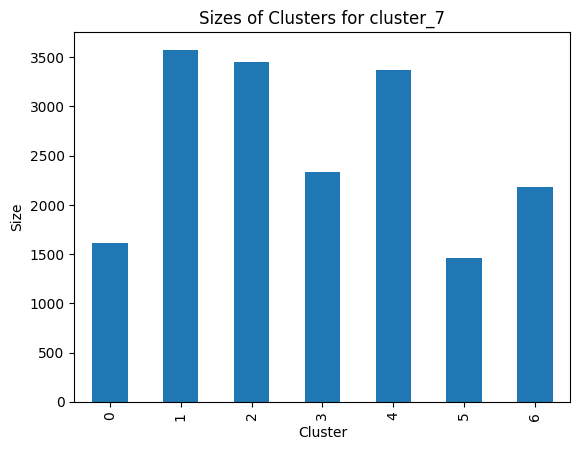

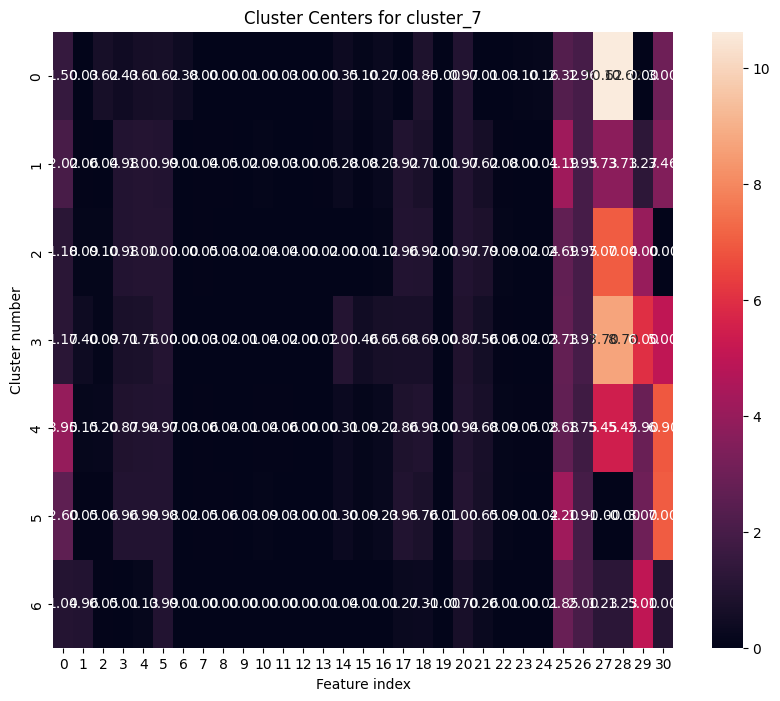

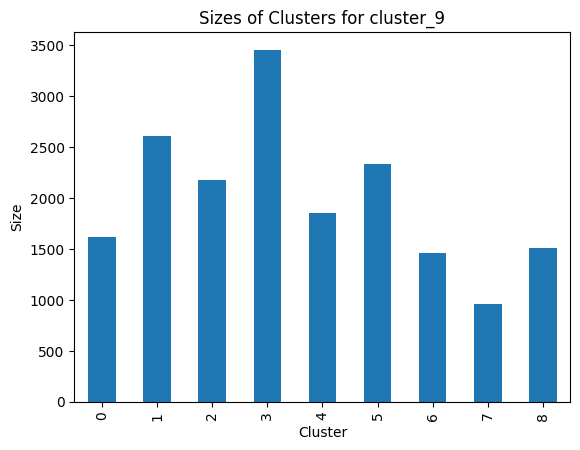

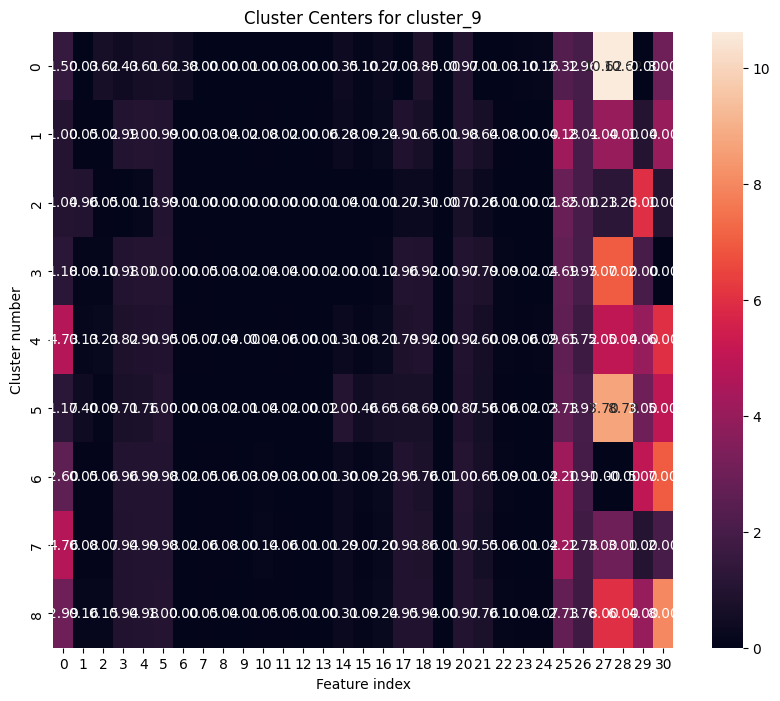

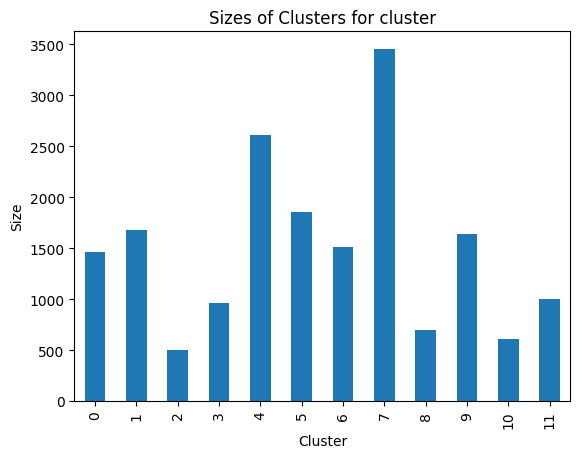

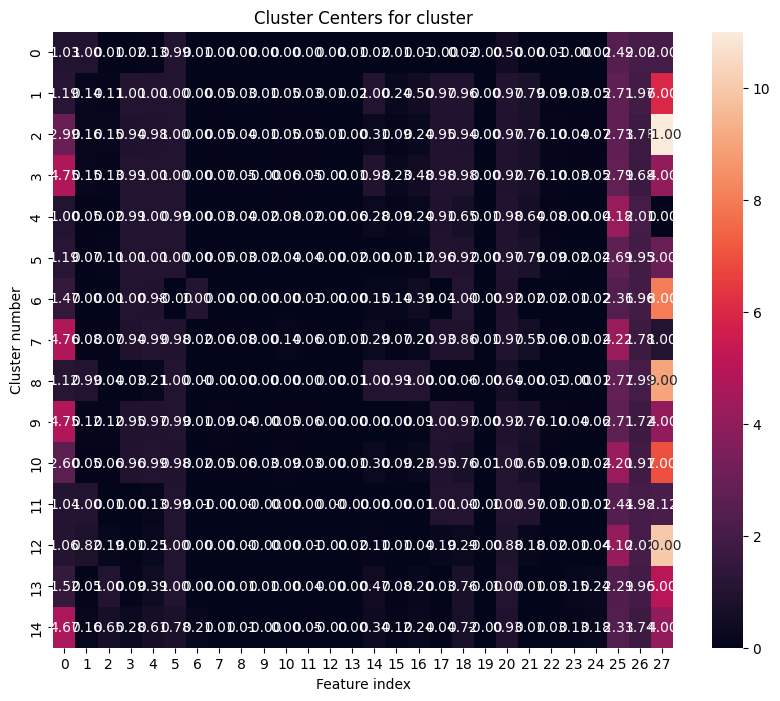

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster_sizes(df, cluster_label):
    cluster_sizes = df[cluster_label].value_counts().sort_index()
    cluster_sizes.plot(kind='bar')
    plt.title(f'Sizes of Clusters for {cluster_label}')
    plt.xlabel('Cluster')
    plt.ylabel('Size')
    plt.show()

def plot_cluster_centers(kmeans_model, cluster_label):
    plt.figure(figsize=(10, 8))
    sns.heatmap(kmeans_model.cluster_centers_, annot=True, fmt=".2f")
    plt.title(f'Cluster Centers for {cluster_label}')
    plt.xlabel('Feature index')
    plt.ylabel('Cluster number')
    plt.show()

# Plot cluster sizes for 7 clusters
plot_cluster_sizes(df_encoded, 'cluster_7')

# Plot cluster centers for 7 clusters
plot_cluster_centers(kmeans_7, 'cluster_7')

# Plot cluster sizes for 9 clusters
plot_cluster_sizes(df_encoded, 'cluster_9')

# Plot cluster centers for 9 clusters
plot_cluster_centers(kmeans_9, 'cluster_9')

# Plot cluster sizes for 12 clusters
plot_cluster_sizes(df_encoded, 'cluster')

# Plot cluster centers for 12 clusters
plot_cluster_centers(kmeans, 'cluster')


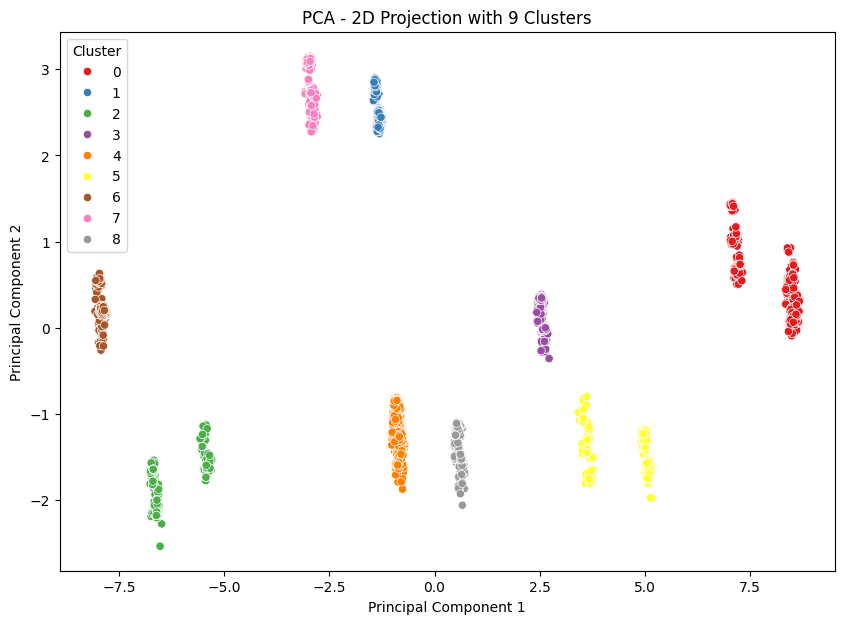

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'cluster_9' column for PCA
df_for_pca = df_encoded.drop('cluster_9', axis=1)

# Perform PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_for_pca)

# Convert the reduced data to a DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Add the cluster labels to the reduced data DataFrame
reduced_df['cluster_9'] = clusters_9

# Plotting the PCA reduced data
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_9', data=reduced_df, palette='Set1', legend='full')
plt.title('PCA - 2D Projection with 9 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


We attain distinct groups and this will be useful if we want to conduct further analysis which may allow us to do targeted marketing or further analysis.

# Model

In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def model_df(data):
  df = data.copy()

  # FLoat types
  float_columns = ['ape_grp_6fc3e6', 'ape_grp_de05ae',
        'ape_grp_945b5a', 'ape_grp_6a5788', 'ape_ltc_43b9d5', 'ape_grp_9cdedf',
        'ape_grp_1581d7', 'ape_grp_22decf', 'ape_lh_507c37', 'ape_lh_839f8a',
        'ape_inv_e9f316', 'ape_grp_caa6ff', 'ape_grp_fd3bfb', 'ape_lh_e22a6a',
        'ape_grp_70e1dd',
        'ape_grp_e91421', 'ape_lh_f852af', 'ape_lh_947b15', 'sumins_grp_6fc3e6',
        'sumins_grp_de05ae', 'sumins_grp_945b5a', 'sumins_grp_6a5788',
        'sumins_grp_9cdedf', 'sumins_grp_1581d7',
        'sumins_lh_507c37', 'sumins_inv_e9f316', 'sumins_grp_caa6ff',
        'sumins_grp_fd3bfb', 'sumins_grp_70e1dd',
        'sumins_grp_e91421', 'sumins_lh_f852af', 'sumins_lh_947b15',
        'prempaid_grp_6fc3e6', 'prempaid_grp_de05ae', 'prempaid_grp_945b5a',
        'prempaid_grp_6a5788', 'prempaid_ltc_43b9d5', 'prempaid_grp_9cdedf',
        'prempaid_grp_1581d7', 'prempaid_grp_22decf', 'prempaid_lh_507c37',
        'prempaid_lh_839f8a', 'prempaid_inv_e9f316', 'prempaid_grp_caa6ff',
        'prempaid_grp_fd3bfb', 'prempaid_lh_e22a6a', 'prempaid_grp_70e1dd',
        'prempaid_grp_e91421', 'prempaid_lh_f852af', 'prempaid_lh_947b15',
        'ape_839f8a', 'ape_e22a6a', 'ape_c4bda5', 'ape_ltc', 'ape_507c37',
        'sumins_839f8a', 'sumins_c4bda5', 'sumins_ltc', 'sumins_507c37',
        'prempaid_839f8a', 'prempaid_e22a6a', 'prempaid_c4bda5', 'prempaid_ltc',
        'prempaid_507c37']
  df[float_columns] = df[float_columns].astype('float')

  return df

- Simple XGB model does not work despite high accuracy, as classes in our data is very imbalanced.

With class weights for balancing, achieve better performance

In [59]:
from sklearn.ensemble import RandomForestClassifier

df = model_df(da_no_missing_data)


# Extract features and target variable
X = df.drop('f_purchase_lh', axis=1)
y = df['f_purchase_lh']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define Random Forest parameters
params = {
  'n_estimators': 200,
  'max_depth': 5, # From grid search
  'class_weight': 'balanced',  # From grid search
  'random_state': 42
}

# Create Random Forest classifier
rf_model = RandomForestClassifier(**params)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_binary = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

def selected_model(X_test):
  return rf_model.predict(X_test)

NameError: name 'da_no_missing_data' is not defined

In [ ]:
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
top_features = X.columns[sorted_idx[:80]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Extract features and target variable
X = df[top_features]
y = df['f_purchase_lh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define Random Forest parameters
params = {
  'n_estimators': 200,
  'max_depth': 5, # From grid search
  'class_weight': 'balanced',  # From grid search
  'random_state': 42
}

# Create Random Forest classifier
rf_model = RandomForestClassifier(**params)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_binary = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

def selected_model(X_test):
  return rf_model.predict(X_test)

In [ ]:
X_test

In [ ]:
## TEST Random Forest to maximise recall for 1.0

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Extract features and target variable
X = df.drop('f_purchase_lh', axis=1)
y = df['f_purchase_lh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest parameters
params = {
    'n_estimators': 500,
    'max_depth': 10,
    'min_samples_split': 2,
    'class_weight': 'balanced',
    'random_state': 42
}

# Create Random Forest classifier
rf_model = RandomForestClassifier(**params)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.3  # Experiment with different threshold values
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_prob]

# Evaluate the model with the adjusted threshold
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)


In [ ]:
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
top_features = X.columns[sorted_idx[:60]]
top_features

In [ ]:
## TEST Random Forest to maximise recall for 1.0

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Extract features and target variable
X = df[top_features]
y = df['f_purchase_lh']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest parameters
params = {
    'n_estimators': 500,
    'max_depth': 10,
    'min_samples_split': 2,
    'class_weight': 'balanced',
    'random_state': 42
}

# Create Random Forest classifier
rf_model = RandomForestClassifier(**params)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.3  # Experiment with different threshold values
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_prob]

# Evaluate the model with the adjusted threshold
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)


In [ ]:
print(top_features)

In [ ]:
## This takes some time to run, so has been commented

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10],
#     'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 5}]  # Include different class weights
# }

# # Initialize the Random Forest classifier
# rf_model = RandomForestClassifier(random_state=42)

# # Perform GridSearchCV with scoring set to F1 for class 1
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best model from the grid search
# best_model = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred_binary = best_model.predict(X_test)


# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred_binary))

# print("Confusion Matrix:")
# conf_matrix = confusion_matrix(y_test, y_pred_binary)
# print(conf_matrix)

In [ ]:
# best_model.get_params()
# used this information for the rnadom forest

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    ## Data Cleaning Steps
    data = clean1(hidden_data)
    data = remove_col_one_unique_val(data)
    data = clean2(data)
    data = clean_categorical(data)
    data = impute_categorical(data)
    data = clean_continuous(data)
    data = impute_continuous(data)
    data = get_no_missing_data(data)
    #data = cluster(data)
    data = model_df(data)
    data = data[top_features]
    predicted = selected_model(data)
    return list(predicted)

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
true_values = test_df["f_purchase_lh"]
test_df = test_df.drop(columns=["f_purchase_lh"])

predictions = testing_hidden_data(test_df)

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!